# Reto | Segmentación de datos empleados 👩🏽‍💻📊

# Introducción
**Objetivos**


El objetivo de este reto es poner en práctica los contenidos revisados durante el módulo realizando los siguientes pasos:


*  Segmentarás datos que influyen en la tasa de deserción de empleados.
*  Seleccionarás el número adecuado de grupos de empleados.
*  Realizarás distintas visualizaciones sobre los resultados obtenidos.
*  Analizarás los resultados para apoyar la toma de decisiones.


**Introducción**

Para el reto, la base de datos tiene datos de empleados como la educación, el estado civil, el salario y otros factores que influyen en la tasa de deserción.

Los empleados son la parte más importante de una organización. Los empleados exitosos cumplen con los plazos, realizan ventas y construyen la marca a través de interacciones positivas con los clientes. La deserción de empleados es un costo importante para una organización y predecir tales deserciones es el requisito más importante del departamento de Recursos Humanos en mucha organizaciones.

En este reto, tu tarea es agrupar a los empleados y brindar una interpretación de los grupos obtenidos, tomando como una de las variables más relevantes para la descripción de los resultados la ratio de deserción Attrition_rate.

**Instrucciones**

Para poder solucionar exitosamente este reto, necesitarás llevar a cabo los siguientes pasos:  

# Carga los datos del archivo

a.	Descarga el archivo en la plataforma kaggle.com

b.	Abre el archivo Train.csv para conocer su estructura y familiarizarse con la información contenida en él.

c.	Crea un DataFrame en pandas para el archivo.

In [22]:
# Importación de plataformas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [23]:
emp = pd.read_csv('Train.csv')
emp.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  ...  Compensation_and_Benefits  Work_Life_balance  \
0                     4  ...                      type2                3.0   
1                     4  ...                      type2                4.0   
2                     3  ...                      type2                1.0   
3                     3  ...                      type2                1.0   
4                     4  ...                      type3                3.0   

   VAR1    VAR2    VAR3  VAR4  VAR5  VAR6  VAR7  Attrition_rate  
0     4  0.7516  1.8688   2.0     4     5     3          0.1841  
1     3 -0.9612 -0.4537   2.0     3     5     3          0.0670  
2     4 -0.9612 -0.4537   3.0     3     8     3          0.0851  
3     3 -1.8176 -0.4537   NaN     3     7     3          0.0668  
4     1  0.7516 -0.4537   2.0     2     8     2          0.1827  

[5 rows x 24 columns]

In [24]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [25]:
# Sustitución de nulos por el promedio de la columna
emp['Age'] = emp['Age'].fillna(emp['Age'].mean())
emp['Time_of_service'] = emp['Time_of_service'].fillna(emp['Time_of_service'].mean())
emp['Pay_Scale'] = emp['Pay_Scale'].fillna(emp['Pay_Scale'].mean())
emp['Work_Life_balance'] = emp['Work_Life_balance'].fillna(emp['Work_Life_balance'].mean())
emp['VAR2'] = emp['VAR2'].fillna(emp['VAR2'].mean())
emp['VAR4'] = emp['VAR4'].fillna(emp['VAR4'].mean())

# Eliminar ID
emp.drop('Employee_ID', axis=1, inplace=True)

# Validación
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        7000 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            7000 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  7000 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   objec

# Transforma los datos según las características de las variables

a.	Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.

b.	La selección de las variables y de estos métodos depende del modelo de su solución y será evaluada su pertenencia según los datos.

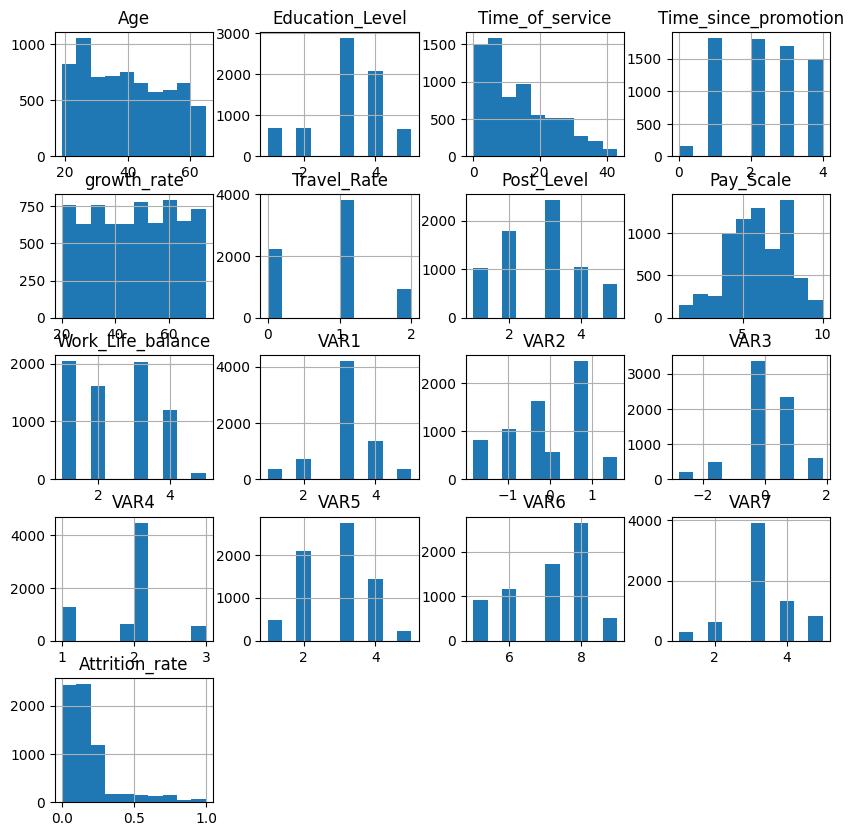

In [26]:
# Análisis variables numéricas
emp_num = emp[['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']]

emp_num.hist(figsize=(10,10))
plt.show()

In [27]:
# Análisis variables categóricas
emp_cat = emp[['Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits']]

print('Valores únicos Gender: ',len(emp['Gender'].unique()))
print('Valores únicos Relationship_Status: ',len(emp['Relationship_Status'].unique()))
print('Valores únicos Hometown: ',len(emp['Hometown'].unique()))
print('Valores únicos Unit: ',len(emp['Unit'].unique()))
print('Valores únicos Decision_skill_possess: ',len(emp['Decision_skill_possess'].unique()))
print('Valores únicos Compensation_and_Benefits: ',len(emp['Compensation_and_Benefits'].unique()))

Valores únicos Gender:  2
Valores únicos Relationship_Status:  2
Valores únicos Hometown:  5
Valores únicos Unit:  12
Valores únicos Decision_skill_possess:  4
Valores únicos Compensation_and_Benefits:  5


In [41]:
# Columnas categóricas por transformar
cat_oh = ['Gender','Relationship_Status']
cat_ord = ['Hometown', 'Unit', 'Decision_skill_possess','Compensation_and_Benefits']

emp2 = emp.copy()

# Transformación con OneHotEncoder
oh_encoder = OneHotEncoder(sparse_output=False, drop='first')
for col in cat_oh:
    # Transformar y obtener el DataFrame resultante de la codificación
    encoded = oh_encoder.fit_transform(emp2[[col]])
    # Crear nombres para las nuevas columnas
    oh_columns = [f"{col}_{cat}" for cat in oh_encoder.categories_[0][1:]]
    # Convertir la matriz resultante en un DataFrame
    encoded_df = pd.DataFrame(encoded, columns=oh_columns, index=emp2.index)
    # Concatenar el DataFrame original con las nuevas columnas codificadas
    emp2 = pd.concat([emp2, encoded_df], axis=1)
    # Eliminar la columna original
    emp2.drop(columns=[col], inplace=True)

# Transformación con OrdinalEncoder
ord_encoder = OrdinalEncoder()
emp2[cat_ord] = ord_encoder.fit_transform(emp2[cat_ord])

emp2.head()

Age  Education_Level  Hometown  Unit  Decision_skill_possess  \
0  42.0                4       1.0   2.0                     2.0   
1  24.0                3       3.0   3.0                     0.0   
2  58.0                3       0.0   8.0                     2.0   
3  26.0                3       2.0   1.0                     1.0   
4  31.0                1       3.0   3.0                     2.0   

   Time_of_service  Time_since_promotion  growth_rate  Travel_Rate  \
0              4.0                     4           33            1   
1              5.0                     4           36            0   
2             27.0                     3           51            0   
3              4.0                     3           56            1   
4              5.0                     4           62            1   

   Post_Level  ...  VAR1    VAR2    VAR3      VAR4  VAR5  VAR6  VAR7  \
0           1  ...     4  0.7516  1.8688  2.000000     4     5     3   
1           3  ...     3 -0.9612 -0.4537  2.000000     3     5     3   
2           2  ...     4 -0.9612 -0.4537  3.000000     3     8     3   
3           3  ...     3 -1.8176 -0.4537  1.891078     3     7     3   
4           3  ...     1  0.7516 -0.4537  2.000000     2     8     2   

   Attrition_rate  Gender_M  Relationship_Status_Single  
0          0.1841       0.0                         0.0  
1          0.0670       1.0                         1.0  
2          0.0851       0.0                         0.0  
3          0.0668       0.0                         1.0  
4          0.1827       0.0                         0.0  

[5 rows x 23 columns]

In [47]:
emp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         7000 non-null   float64
 1   Education_Level             7000 non-null   int64  
 2   Hometown                    7000 non-null   float64
 3   Unit                        7000 non-null   float64
 4   Decision_skill_possess      7000 non-null   float64
 5   Time_of_service             7000 non-null   float64
 6   Time_since_promotion        7000 non-null   int64  
 7   growth_rate                 7000 non-null   int64  
 8   Travel_Rate                 7000 non-null   int64  
 9   Post_Level                  7000 non-null   int64  
 10  Pay_Scale                   7000 non-null   float64
 11  Compensation_and_Benefits   7000 non-null   float64
 12  Work_Life_balance           7000 non-null   float64
 13  VAR1                        7000 

In [48]:
# Conversión a matriz numérica
X_train = emp2.to_numpy()
print(X_train)

[[42.      4.      1.     ...  0.1841  0.      0.    ]
 [24.      3.      3.     ...  0.067   1.      1.    ]
 [58.      3.      0.     ...  0.0851  0.      0.    ]
 ...
 [49.      3.      3.     ...  0.7847  0.      1.    ]
 [47.      3.      4.     ...  0.4162  0.      0.    ]
 [58.      3.      1.     ...  0.091   0.      0.    ]]


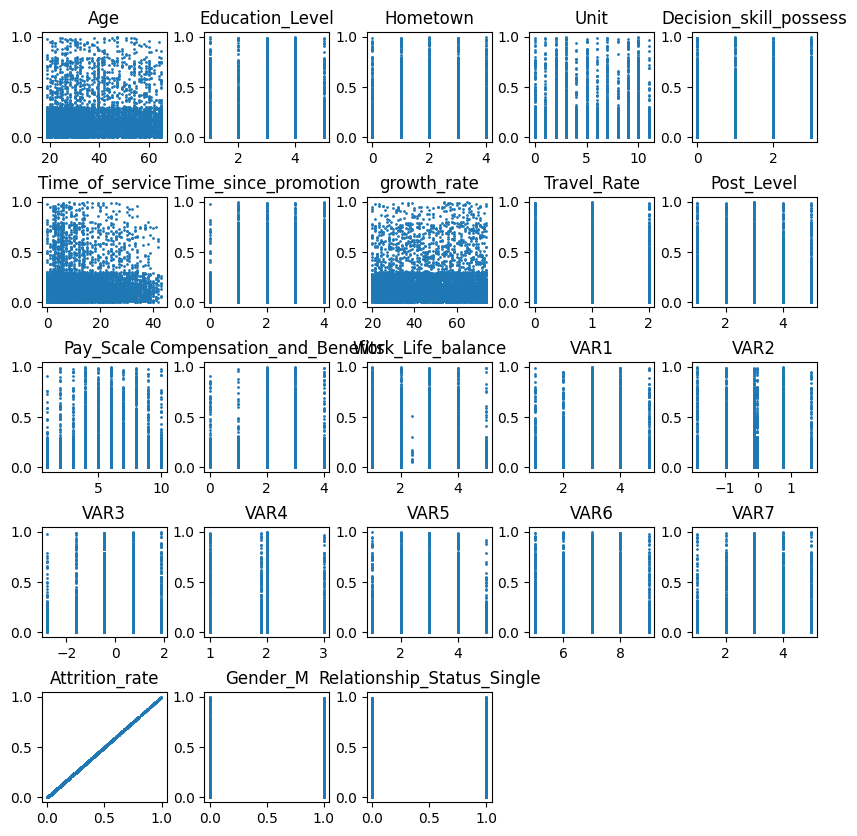

In [59]:
# Análisis datos convertidos a numéricos vs Attrition rate
v = 0
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    if v < 23:
      axs[i,j].scatter(X_train[:,v], X_train[:,20], s=1)
      axs[i,j].set_title(emp2.columns[v])
      v+=1
    else:
      axs[i, j].axis('off')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

#	Selecciona el número de grupos adecuados para agrupar usando K-means

a.	Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.

b.	Utiliza una estrategia para determinar el número adecuado de grupos como K-Elbow o Silhouette-Plot.

In [60]:
# Estandarización de los datos
X = StandardScaler().fit_transform(X_train)

In [61]:
X

array([[ 0.18009898,  0.76255659, -1.00647929, ..., -0.02840599,
        -0.83756018, -0.74072435],
       [-1.18359795, -0.17638732,  0.69221993, ..., -0.65885713,
         1.19394406,  1.35002987],
       [ 1.39227403, -0.17638732, -1.8558289 , ..., -0.56140908,
        -0.83756018, -0.74072435],
       ...,
       [ 0.71042557, -0.17638732,  0.69221993, ...,  3.20514613,
        -0.83756018,  1.35002987],
       [ 0.55890369, -0.17638732,  1.54156955, ...,  1.22119016,
        -0.83756018, -0.74072435],
       [ 1.39227403, -0.17638732, -1.00647929, ..., -0.52964425,
        -0.83756018, -0.74072435]])

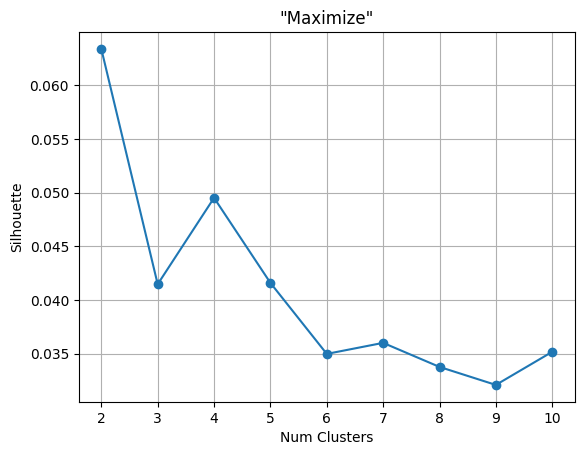

In [63]:
# Ejecutar algoritmo k-means con diferentes números de grupos (2 a 10) para seleccionar un número adecuado
y_preds = []
results = {}

for k in range(2, 11):
  k_means = cluster.KMeans(n_clusters=k, n_init=10).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

La gráfica K-Elbow indica que 4, 7 o 10 pueden ser una cantidad de grupos adecuados, considerando los puntos donde se observa un pico.
Se decide también experimentar usando otros algoritmos y construir sus gráficas K-Elbow para observar si es que existe algún patrón en el número de grupos que pudiesen ser adecuados.

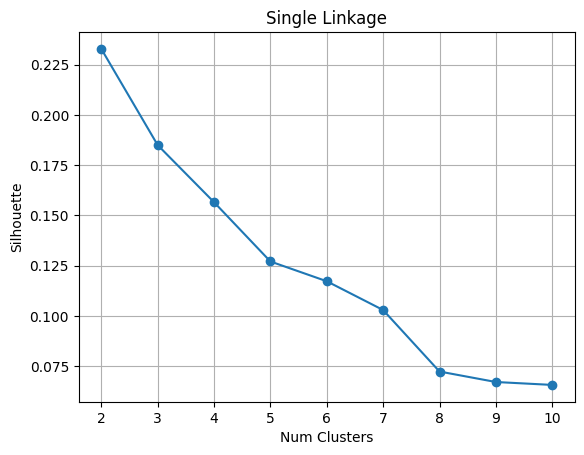

In [65]:
y_preds = []
results = {}

for k in range(2, 11):
  sl = AgglomerativeClustering(n_clusters=k, linkage='single')
  y_pred = sl.fit_predict(X)
  score = silhouette_score(X, y_pred)
  results[k] = score

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('Single Linkage')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

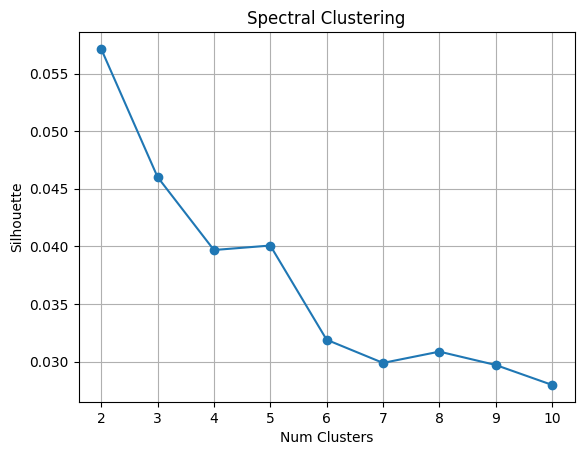

In [66]:
y_preds = []
results = {}

for k in range(2, 11):
  sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=0)
  y_pred = sc.fit_predict(X)
  score = silhouette_score(X, y_pred)
  results[k] = score

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('Spectral Clustering')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

Para continuar el análisis con la gráfica de Silhouette-Plot, se determina alguna columna que pudiese ser relevante respecto a la tasa de deserción, esto por medio de su correlación:

In [80]:
# Correlación entre variables
X_df = pd.DataFrame(X, columns=emp2.columns[0:23])
corr_matrix = X_df.corr()

corr_matrix['Attrition_rate']

Age                          -0.015086
Education_Level              -0.008143
Hometown                      0.006784
Unit                          0.024324
Decision_skill_possess        0.018104
Time_of_service              -0.016213
Time_since_promotion          0.013880
growth_rate                   0.014247
Travel_Rate                  -0.012608
Post_Level                    0.016402
Pay_Scale                    -0.015221
Compensation_and_Benefits    -0.025175
Work_Life_balance             0.020738
VAR1                         -0.008073
VAR2                         -0.022895
VAR3                          0.001245
VAR4                         -0.012576
VAR5                         -0.004770
VAR6                         -0.003130
VAR7                         -0.015299
Attrition_rate                1.000000
Gender_M                      0.028544
Relationship_Status_Single    0.009107
Name: Attrition_rate, dtype: float64

Con base en los resultados, se decide graficar a la variable "Compensation_and_Benefits" que es de las que tiene la mayor correlación, y también tiene mucho sentido que las compensaciones y beneficios tengan peso al momento de que un empleado decide o no desertar de la compañía.

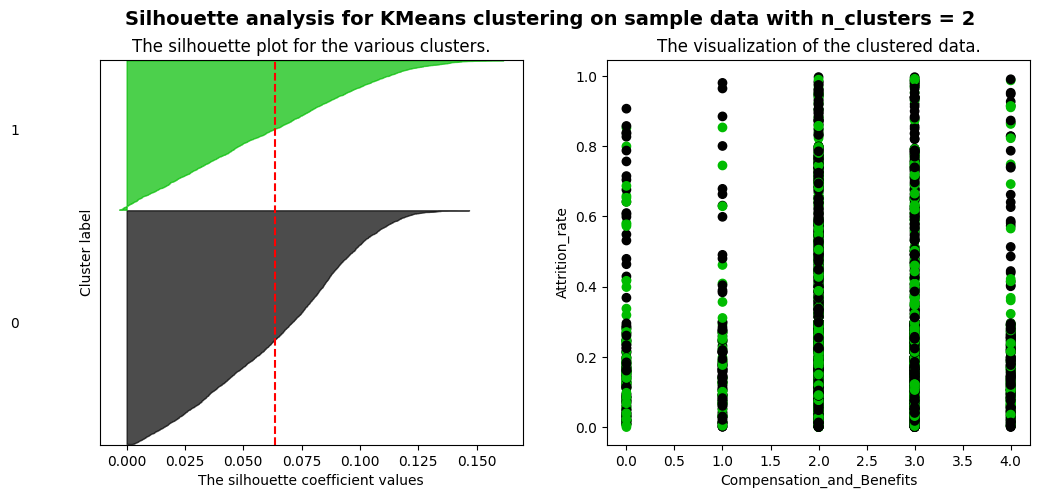

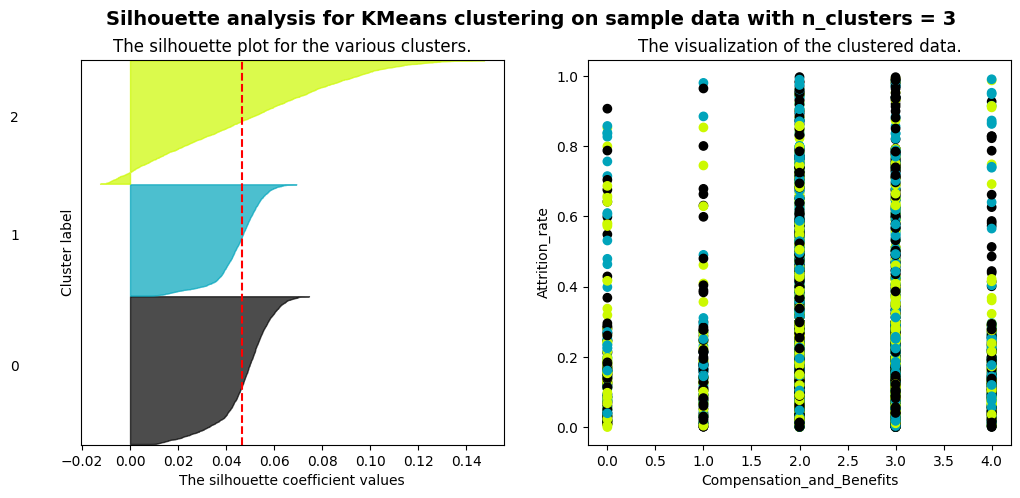

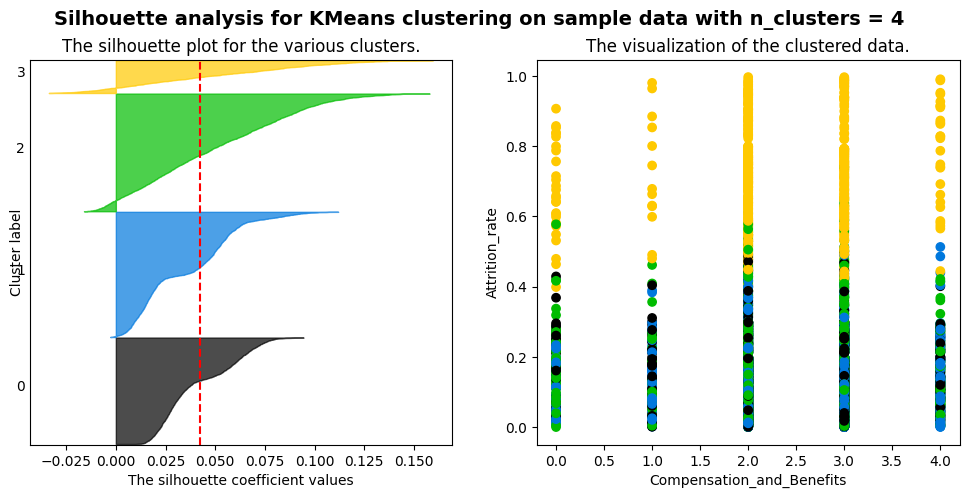

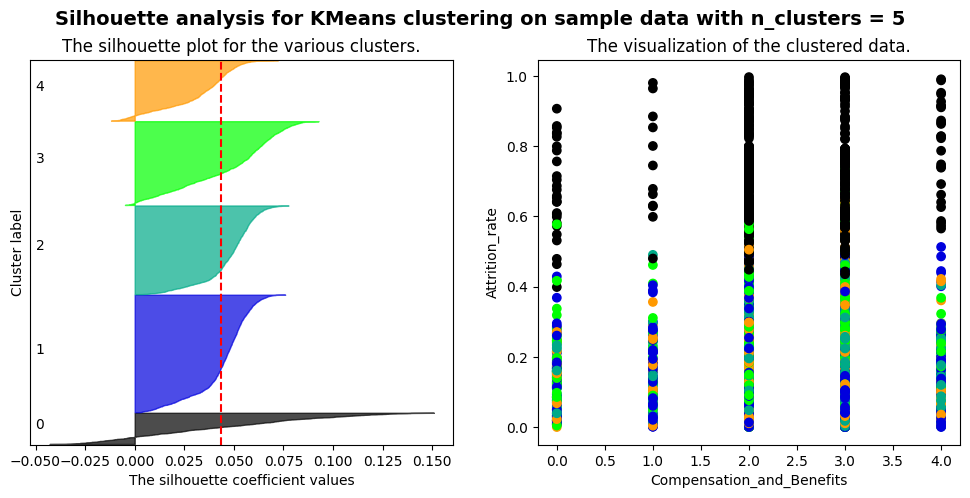

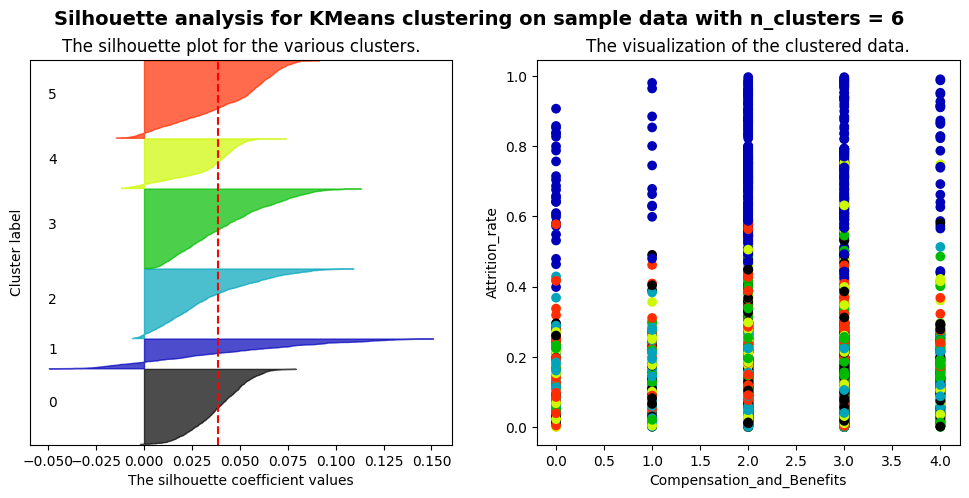

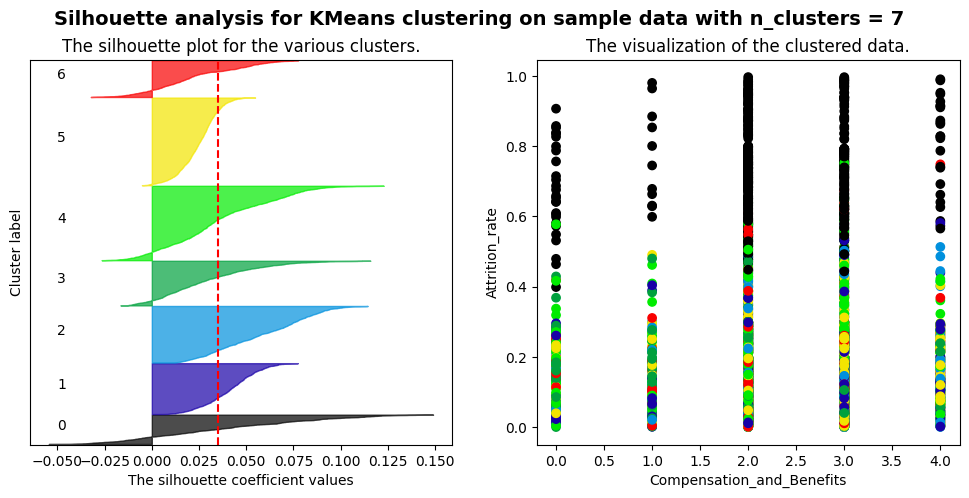

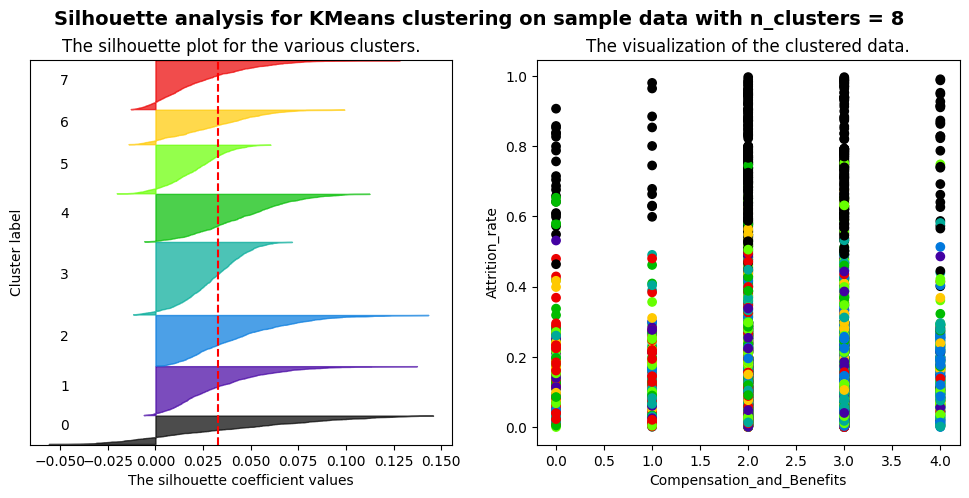

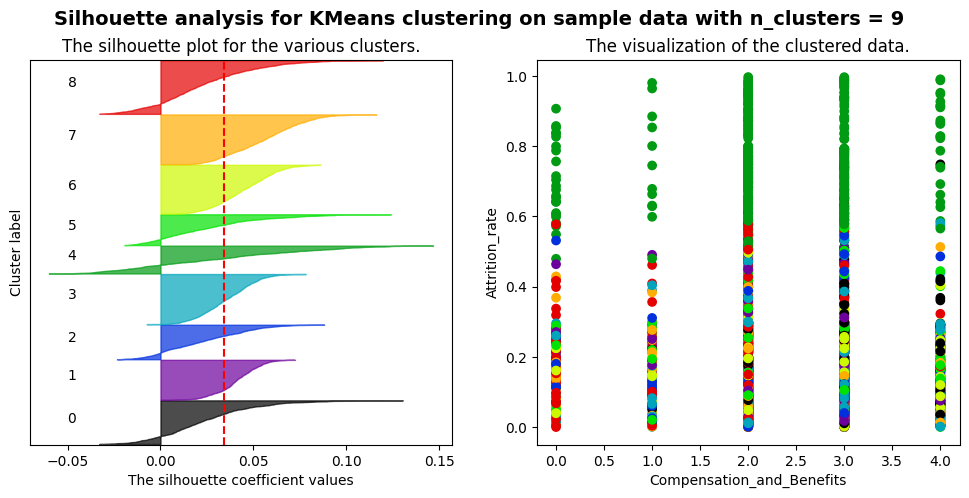

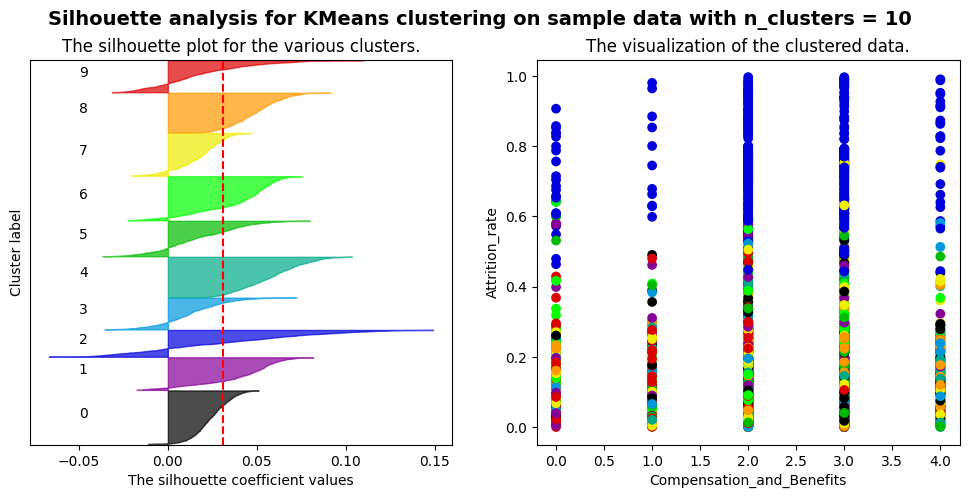

In [82]:
# Gráfica Silhouette-Plot

import matplotlib.cm as cm

for k in range(2, 11):
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)

  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])

  k_means = cluster.KMeans(n_clusters=k, n_init=10)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)

  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks

  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X_train[:, 11], X_train[:, 20], c=colors)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel('Compensation_and_Benefits')
  ax1.set_ylabel('Attrition_rate')
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')

plt.show()

Analizando las gráficas de Silhouette plot, se define elegir **4 grupos** para el algoritmo de clustering, esto por una parte sustentado por el análisis previo K-Elbow, y por otra confirmando con Silhouette plot. Lo que podemos observar es que con 4 grupos quedan pocos datos "desagrupados" (con índice menor a 0), también es notorio que el cluster 3 amarillo está muy bien definido y segmentado del resto, y adicional los índices de cada grupo van desde el coeficiente 0.1 o más, el resto de número de grupos denota índices menores (a excepción de la gráfica de 2 grupos, pero esto puede ser muy sesgado).

# Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo
a. Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo.

In [85]:
# Clustering con k means

k = 4  # Número de grupos

k_means = cluster.KMeans(n_clusters=k, n_init=10)
y_pred = k_means.fit_predict(X)
s = metrics.silhouette_score(X, y_pred1)

print(f"Silhouette score: {s}")

Silhouette score: 0.04737017181608683


In [86]:
# Etiquetar dataframe original con el grupo asignado

emp['group'] = y_pred
emps = [emp[emp['group']==g] for g in range(k)]

In [88]:
# Tamaño de los grupos

for g in range(k):
    print('El grupo'+str(g),'tiene',len(emps[g]),'empleados.')

El grupo0 tiene 2680 empleados.
El grupo1 tiene 585 empleados.
El grupo2 tiene 1649 empleados.
El grupo3 tiene 2086 empleados.


In [89]:
# Descripción de los grupos

grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Variables'] = emp.columns[:-1]
# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(k):
    row = []
    for col in grouped['Variables']:
        if emps[g][col].dtype != 'object':
            row.append(np.round(emps[g][col].mean(),2))
        else:
            row.append(emps[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = row
# Visualizar el dataframe
grouped

Variables      Group0     Group1      Group2     Group3
0                      Gender           F          F           F          F
1                         Age       31.73      38.22       33.17      55.26
2             Education_Level        3.21       3.16         3.2       3.17
3         Relationship_Status     Married    Married      Single    Married
4                    Hometown     Lebanon    Lebanon     Lebanon    Lebanon
5                        Unit          IT         IT          IT         IT
6      Decision_skill_possess  Analytical  Directive  Analytical  Directive
7             Time_of_service        7.09      11.96        8.08      26.06
8        Time_since_promotion        2.28       2.42        2.28       2.53
9                 growth_rate        47.0      47.92       47.05      46.91
10                Travel_Rate        0.81       0.79        0.83       0.82
11                 Post_Level        2.77       2.83        2.82       2.81
12                  Pay_Scale        5.96       5.81        6.05        6.1
13  Compensation_and_Benefits       type2      type2       type2      type2
14          Work_Life_balance        2.37       2.51        2.38       2.38
15                       VAR1        3.08       3.14        3.11       3.11
16                       VAR2        -0.0      -0.07        -0.0        0.0
17                       VAR3       -0.04      -0.01         0.0       0.01
18                       VAR4        1.89       1.87         1.9       1.89
19                       VAR5        2.84       2.81        2.81       2.85
20                       VAR6         7.1       7.09        7.07       7.14
21                       VAR7        3.25       3.16        3.29       3.26
22             Attrition_rate        0.14        0.7        0.14       0.15

#  Interpreta los resultados obtenidos
a. Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.

b. Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.

In [90]:
dfg = grouped.transpose()
dfg.columns = dfg.loc['Variables']
dfg = dfg.drop('Variables')
dfg = dfg[dfg.columns[0:23]]
dfg

Variables Gender    Age Education_Level Relationship_Status Hometown Unit  \
Group0         F  31.73            3.21             Married  Lebanon   IT   
Group1         F  38.22            3.16             Married  Lebanon   IT   
Group2         F  33.17             3.2              Single  Lebanon   IT   
Group3         F  55.26            3.17             Married  Lebanon   IT   

Variables Decision_skill_possess Time_of_service Time_since_promotion  \
Group0                Analytical            7.09                 2.28   
Group1                 Directive           11.96                 2.42   
Group2                Analytical            8.08                 2.28   
Group3                 Directive           26.06                 2.53   

Variables growth_rate  ... Compensation_and_Benefits Work_Life_balance  VAR1  \
Group0           47.0  ...                     type2              2.37  3.08   
Group1          47.92  ...                     type2              2.51  3.14   
Group2          47.05  ...                     type2              2.38  3.11   
Group3          46.91  ...                     type2              2.38  3.11   

Variables  VAR2  VAR3  VAR4  VAR5  VAR6  VAR7 Attrition_rate  
Group0     -0.0 -0.04  1.89  2.84   7.1  3.25           0.14  
Group1    -0.07 -0.01  1.87  2.81  7.09  3.16            0.7  
Group2     -0.0   0.0   1.9  2.81  7.07  3.29           0.14  
Group3      0.0  0.01  1.89  2.85  7.14  3.26           0.15  

[4 rows x 23 columns]

In [95]:
import plotly.graph_objects as go

columnas_numericas = [1,2,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22]
dfg_num = dfg.iloc[:, columnas_numericas ]

Xt = StandardScaler().fit_transform(dfg_num.to_numpy())
Xt = Xt + abs(np.min(Xt))

fig = go.Figure()
for j in range(len(dfg_num)):
  fig.add_trace(go.Bar(
      y=Xt[j,:],
      x=dfg_num.columns,
      name='Group '+str(j)
  ))
fig.update_layout(
    title='Variable mean per group',
    yaxis_title='normalized values',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

In [96]:
# Gráfico de cajas y bigotes

emp_cb = emp.sort_values('group')
group = emp_cb['group']
emp_cb = emp_cb[emp_cb.columns[columnas_numericas]]

Xt = StandardScaler().fit_transform(emp_cb.to_numpy())

x = ['Group '+str(g) for g in group]

fig = go.Figure()
for j in range(len(emp_cb.columns)):
  fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=emp_cb.columns[j]
  ))

fig.update_layout(
    title='Variable boxplot per group',
    yaxis_title='normalized values',
    boxmode= 'group'
)
fig.show()

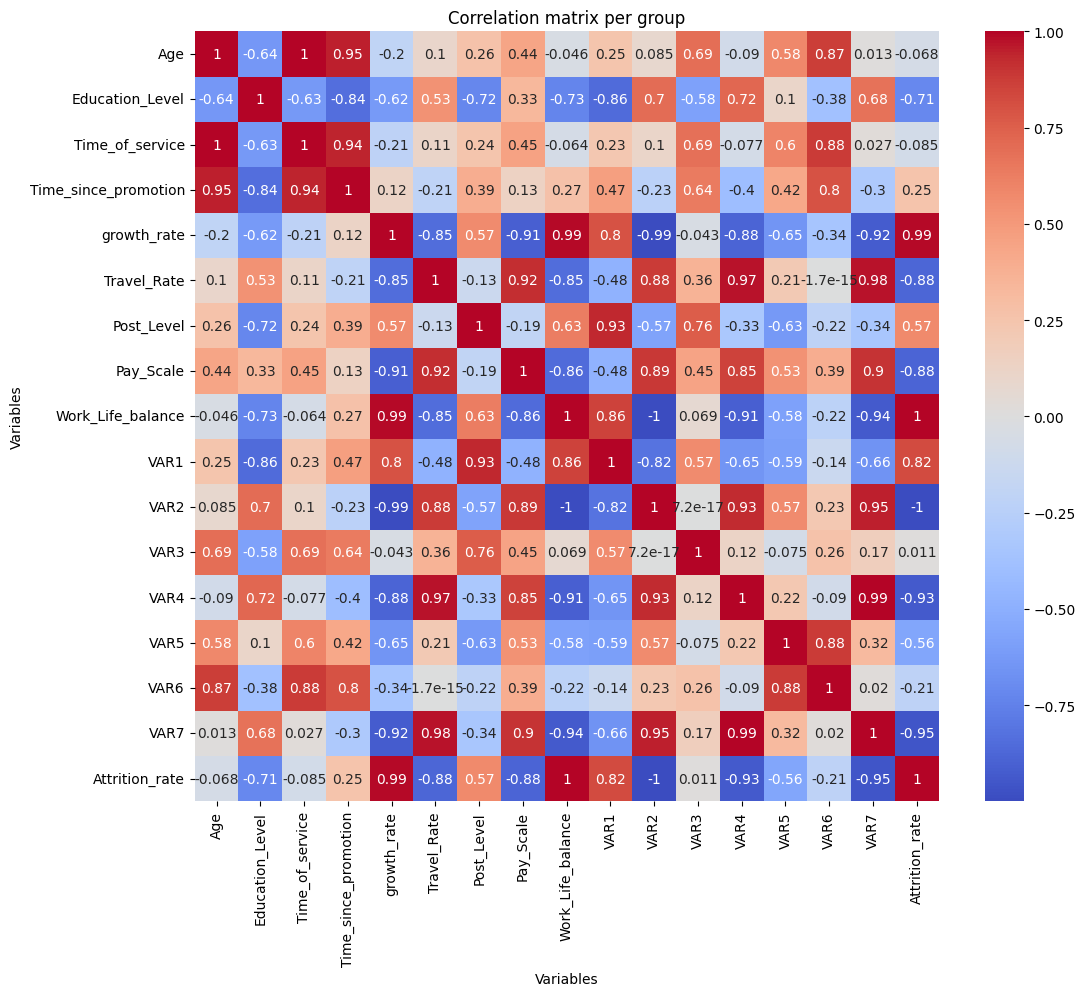

In [102]:
# Matriz de correlación

import seaborn as sns

# Calcular la matriz de correlación
corr_matrix2 = dfg_num.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix per group')
plt.show()

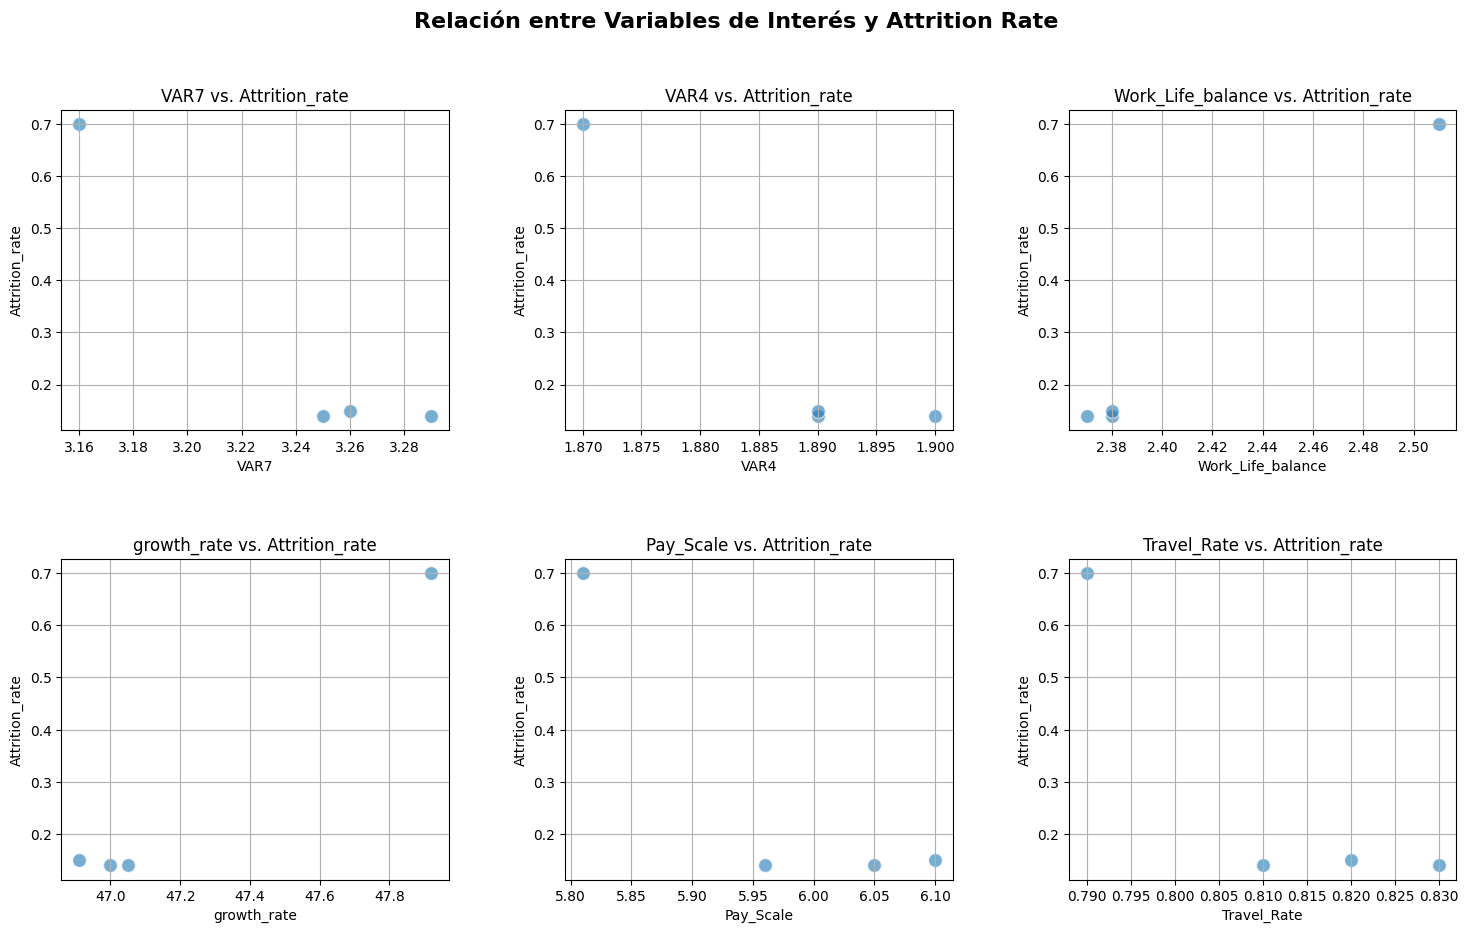

In [113]:
# Gráficos de dispersión con variables relevantes

# Variables de interés
variables_interes = ['VAR7', 'VAR4', 'Work_Life_balance', 'growth_rate', 'Pay_Scale', 'Travel_Rate']
target = 'Attrition_rate'

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relación entre Variables de Interés y Attrition Rate', fontsize=16, fontweight='bold')

# Iterar sobre las variables para crear los scatter plots
for i, var in enumerate(variables_interes):
    ax = axs[i // 3, i % 3]  # Determinar la posición en la cuadrícula
    ax.scatter(dfg[var], dfg[target], alpha=0.6, edgecolor='w', s=100)
    ax.set_title(f'{var} vs. {target}')
    ax.set_xlabel(var)
    ax.set_ylabel(target)
    ax.grid(True)

# Ajustar el espacio entre los subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar la figura
plt.show()

# Conclusiones

Grupo 0:

* Demografía: Predominantemente mujeres, con una edad promedio de 31.73 años.
* Educación y Trabajo: Nivel de educación es de 3.21 en promedio. La mayoría están casadas y trabajan en el departamento de IT.
* Habilidades y Experiencia: Tienen habilidades analíticas y una experiencia promedio de 7.09 años.
* Crecimiento y Promociones: Han pasado 2.28 años desde su última promoción, con una tasa de crecimiento de 47%.
* Compensación y Satisfacción: Escala de pago es de 5.96 y tienen una tasa de equilibrio entre vida laboral y personal de 2.37.
* Observación deserción: La tasa es baja (0.14), lo que indica buena retención del personal.


Grupo 1:

* Demografía: También compuesto por mujeres, con una edad promedio de 38.22 años.
* Educación y Trabajo: Nivel educativo promedio de 3.16, están casadas y trabajan en IT.
* Habilidades y Experiencia: Tienen habilidades directivas y una experiencia laboral más amplia de 11.96 años.
* Crecimiento y Promociones: Tiempo desde la última promoción es de 2.42 años, con una tasa de crecimiento del 47.92%.
* Compensación y Satisfacción: Su escala de pago es ligeramente inferior a la del Grupo 0 (5.81), y tienen un equilibrio vida/trabajo de 2.51.
* Observación deserción: Tienen una tasa de atrición significativamente más alta (0.70), lo que podría indicar insatisfacción o búsqueda de mejores oportunidades.

Grupo 2:

* Demografía: Mujeres, con una edad promedio de 33.17 años.
* Educación y Trabajo: Nivel educativo de 3.2, mayoritariamente solteras, y empleadas en IT.
* Habilidades y Experiencia: Habilidades analíticas y 8.08 años de experiencia.
* Crecimiento y Promociones: Tiempo promedio desde la última promoción es de 2.28 años, con una tasa de crecimiento de 47.05%.
* Compensación y Satisfacción: Escala de pago es más alta en comparación con otros grupos (6.05), con un buen equilibrio vida/trabajo de 2.38.
* Observación deserción: Tasa de atrición es baja (0.14), similar al Grupo 0, sugiriendo estabilidad laboral.

Grupo 3:

* Demografía: Mujeres de mayor edad, con un promedio de 55.26 años.
* Educación y Trabajo: Nivel educativo promedio de 3.17, predominantemente casadas, y en IT.
* Habilidades y Experiencia: Habilidades directivas y una experiencia extensa de 26.06 años.
* Crecimiento y Promociones: Tiempo promedio desde la última promoción es de 2.53 años, con una tasa de crecimiento ligeramente menor (46.91%).
* Compensación y Satisfacción: Tienen la escala de pago más alta (6.10) y un equilibrio vida/trabajo de 2.38.
* Observación deserción: Tasa de atrición es baja (0.15), lo que sugiere alta satisfacción y estabilidad en el trabajo.

-------------------------------------------------------------------

En términos generales, se observan datos interesantes como el hecho de que un mejor equilibrio entre la vida laboral y personal, así como una mayor tasa de crecimiento dentro de la organización, no garantizan necesariamente una mayor retención de empleados. No obstante, existen otras variables más influyentes, como la escala salarial (a mayor salario, mayor retención) y el estilo de trabajo que involucra viajes (más viajes, mayor retención), que sí tienen un impacto significativo en la permanencia de los empleados en la empresa.

Además, las variables de origen desconocido VAR4 y VAR7 también muestran una relación inversamente proporcional con la tasa de deserción. Por lo tanto, se recomienda tomar medidas en relación con estas características para mejorar la retención de personal.

Como recomendaciones, se sugiere a la organización realizar un análisis comparativo entre la inversión perdida debido a la deserción de empleados y la inversión necesaria para aumentar los salarios y fomentar un ambiente de trabajo que promueva los viajes cuando sean requeridos. Si la pérdida por deserción es mayor, valdría la pena implementar acciones en favor de estas variables para mejorar la tasa de retención, incluyendo también medidas para las variables VAR4 y VAR7.

Asimismo, se recomienda continuar robusteciendo este modelo de segmentación mediante la modificación de variables o la experimentación con otros algoritmos, ya que aún existen oportunidades para generar grupos con características más contrastantes y distintivas entre ellos.